<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Analysis_of_University_Admissions_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of University Admissions Data
> Project team details:
> 1. Arnav Barman (102053038)
> 1. Aryan Baluja (102003375)

We have taken the [University admissions dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university) from kaggle and after it's analysis, we will predict the probability of admission of a student in particular university based on various parameters.

The different entities or parameters in the dataset are -
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )
---

## Loading the dataset

Importing Libraries

In [75]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

Loading dataset

In [76]:
adm = pd.read_csv("/content/adm_data.csv")
print("Printing the first and last 5 rows of the data")
adm.head()

Printing the first and last 5 rows of the data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [77]:
adm.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


## About the dataset

In [78]:
print("Printing out the description of data")
print("___________________________________________________")
adm.describe()

Printing out the description of data
___________________________________________________


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [79]:
print("Printing out the info of dataset")
print("___________________________________________________")
adm.info()

Printing out the info of dataset
___________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [80]:
adm.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [81]:
adm=adm.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','LOR ':'LOR','University Rating':'UniversityRating','Chance of Admit ':'ChanceOfAdmit'})

In [82]:
print("Printing out the datatypes of columns:")
print("___________________________________________________")
adm.dtypes

Printing out the datatypes of columns:
___________________________________________________


SerialNo              int64
GREScore              int64
TOEFLScore            int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceOfAdmit       float64
dtype: object

In [83]:
print("Printing out the shape of dataset:")
adm.shape

Printing out the shape of dataset:


(400, 9)

## Preprocessing of data

We now check how many NULL values we have in the dataset.

In [84]:
adm.isnull().values.any()

False

In [85]:
adm.isnull().sum()

SerialNo            0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

From the above analysis, we found out that our data has no null values.

The Serial No. data is also of no significance as it is unique descriptor for all the instances in the dataset.

In [86]:
adm=adm.drop(['SerialNo'],axis=1)

> As the dataset we have contains only 400 instances, we will synthetically generate new data to support our original dataset using the [Synthetic Data Vault Project](https://github.com/sdv-dev/SDV). We will further compare our models using the original as well as synthetically modified datasets.

In [87]:
pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
from sdv.tabular import GaussianCopula as GC
GCModel = GC()
GCModel.fit(adm)

In [91]:
new1 = GCModel.sample(400)

In [97]:
new1.shape

(400, 8)

In [98]:
new2 = GCModel.sample(800)

In [99]:
new2.shape

(800, 8)

In [102]:
adm1 = pd.concat([adm, new1], ignore_index=True)
adm1.shape

(800, 8)

In [104]:
adm2 = pd.concat([adm1, new2], ignore_index=True)
adm2.shape

(1600, 8)

## Data Visualisation

### EDA of the original dataset.

In [105]:
adm.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


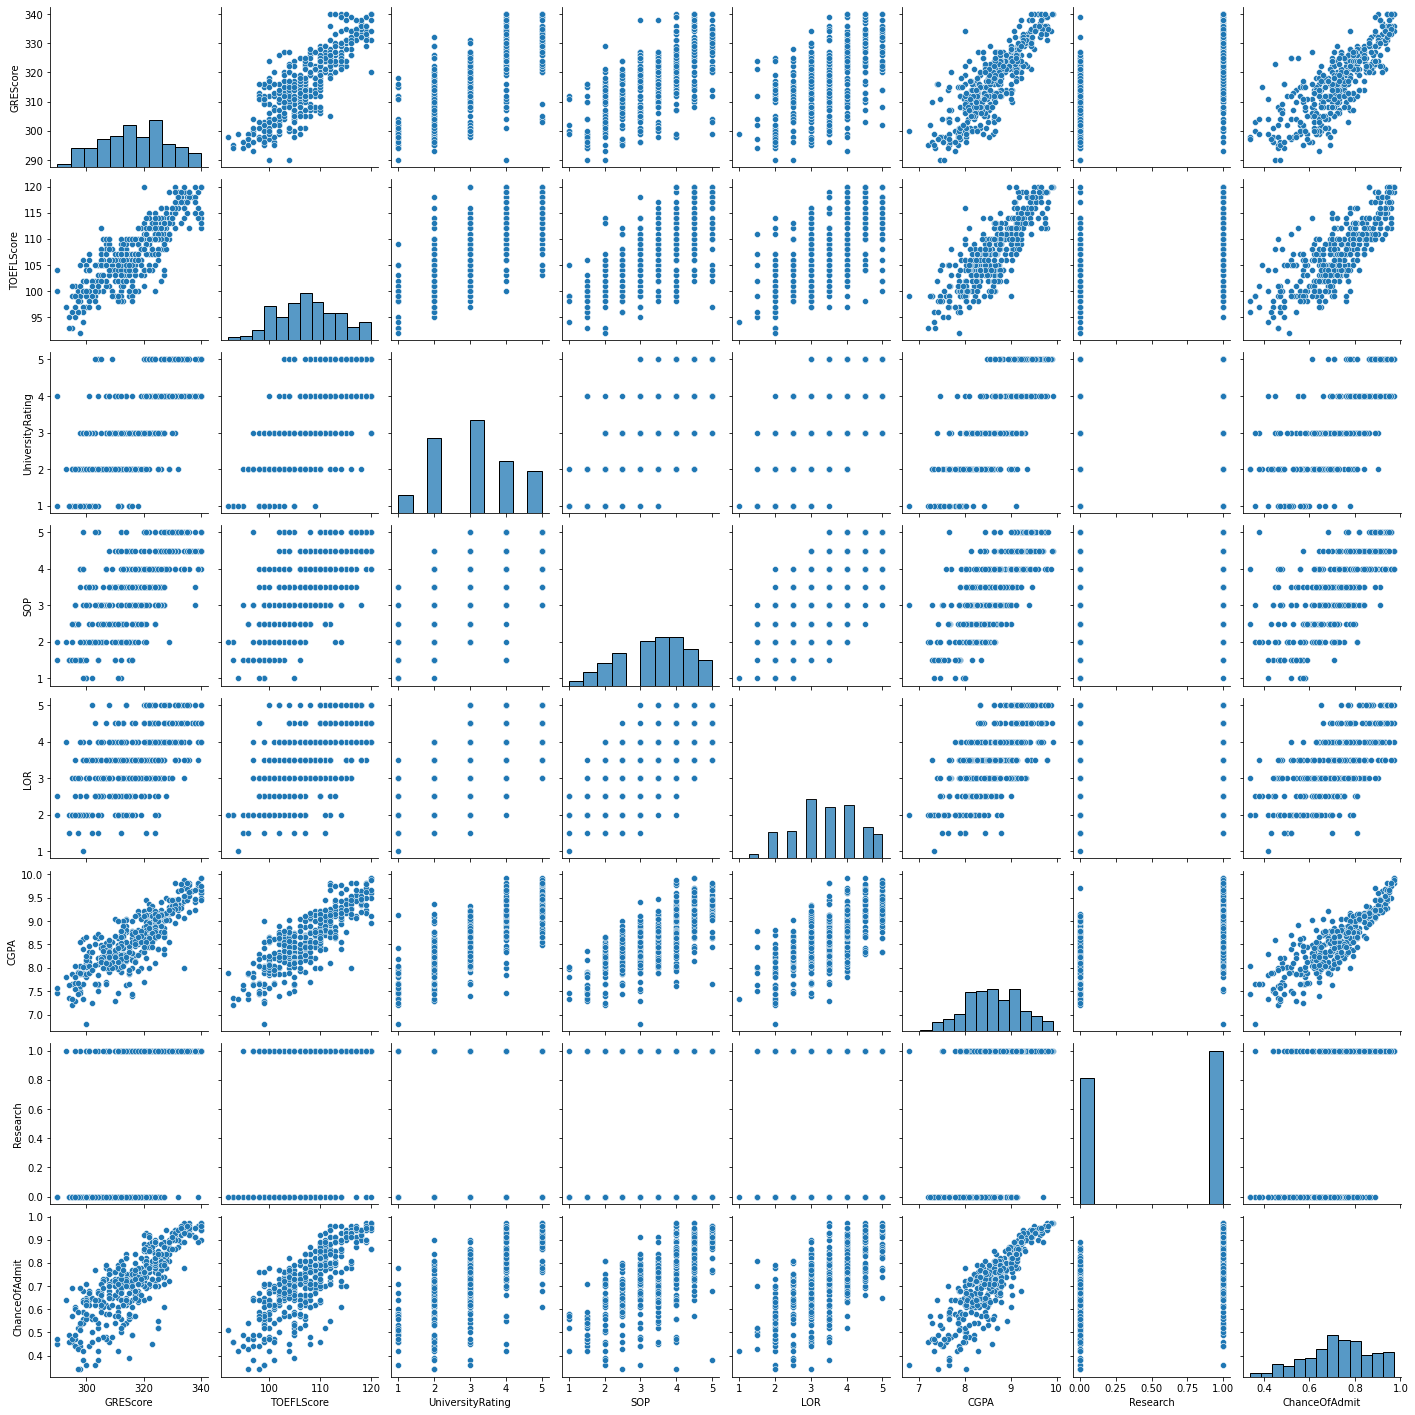

In [106]:
sns.pairplot(adm)
plt.show()

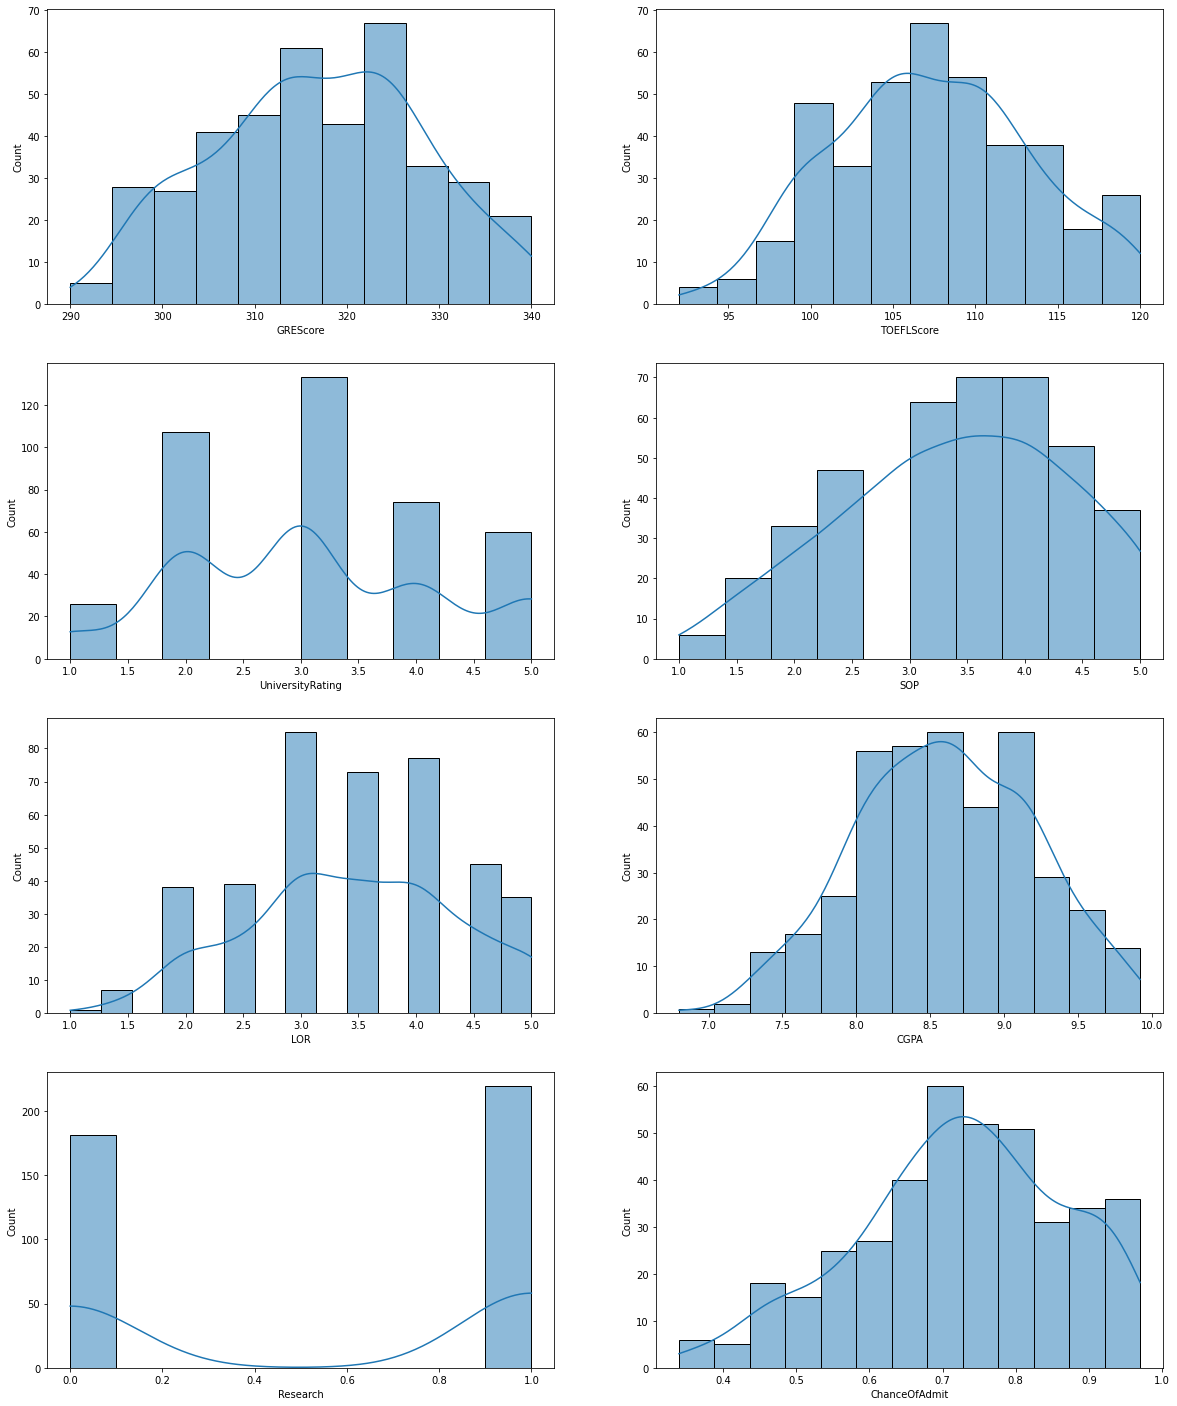

In [107]:
plt.figure(figsize=(20,25))
i = 0
for item in adm.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm[item],kde=True)
plt.show()

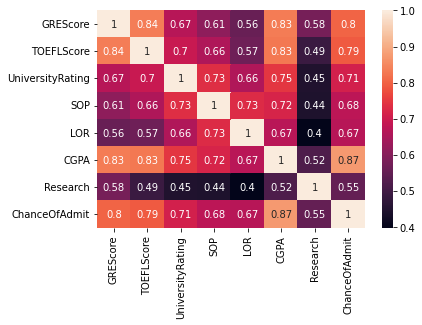

In [108]:
print()
adm.corr()
sns.heatmap(adm.corr(),annot=True)

In [109]:
#sns.countplot(x=adm['University Rating'],hue=adm['Research'])

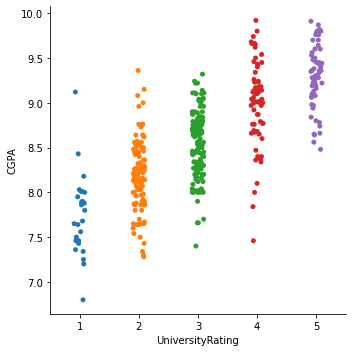

In [110]:
sns.catplot(y="CGPA", x="UniversityRating", data=adm) #can add hue
plt.show()

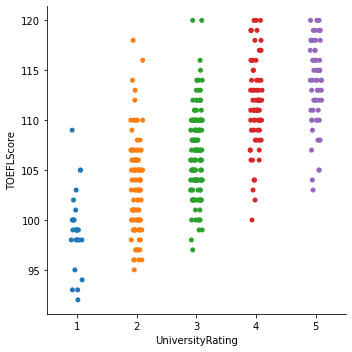

In [111]:
sns.catplot(y="TOEFLScore", x="UniversityRating", data=adm) #can add hue
plt.show()

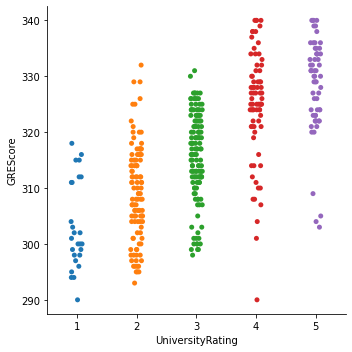

In [112]:
sns.catplot(y="GREScore", x="UniversityRating",data=adm) #can add hue
plt.show()

### GRE Score Analysis:

In [113]:
print("Max GRE Score :",max(adm.GREScore))
print("Min GRE Score :",min(adm.GREScore))

Max GRE Score : 340
Min GRE Score : 290


In [114]:
maxvalues=adm[adm.GREScore>=325]
meanvalues=adm[(adm.GREScore>305)&(adm.GREScore<325)]
minvalues=adm[(adm.GREScore<=305)]

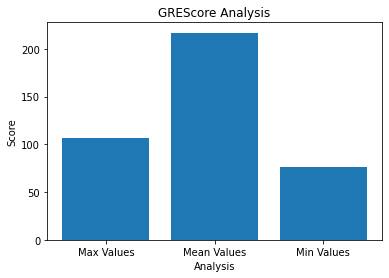

In [115]:
y=np.array([len(maxvalues),len(meanvalues),len(minvalues)])
x=['Max Values','Mean Values','Min Values']
plt.bar(x,y)
plt.title('GREScore Analysis')
plt.xlabel('Analysis')
plt.ylabel('Score')
plt.show()

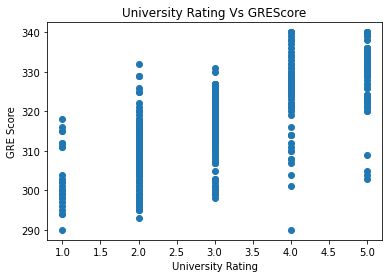

In [116]:
plt.scatter(x='UniversityRating',y='GREScore',data=adm)
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.title('University Rating Vs GREScore')
plt.show()

### TOEFL Score Analysis:

In [117]:
print("Min TOEFLScore :",min(adm.TOEFLScore))
print("Max TOEFLScore :",max(adm.TOEFLScore))

Min TOEFLScore : 92
Max TOEFLScore : 120


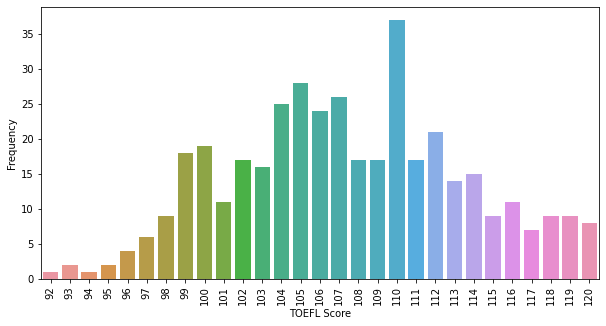

In [118]:
plt.figure(figsize=(10,5))
sns.barplot(x=adm.TOEFLScore.value_counts().index,y=adm.TOEFLScore.value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')
plt.show()

### University Rating Analysis:

In [119]:
adm.UniversityRating.value_counts()

3    133
2    107
4     74
5     60
1     26
Name: UniversityRating, dtype: int64

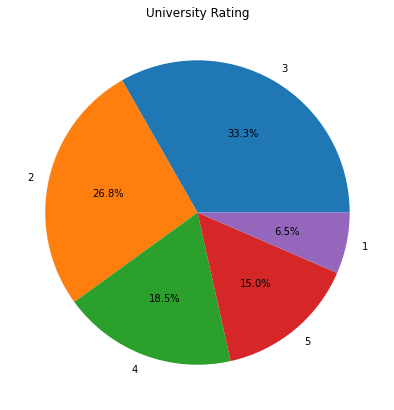

In [120]:
plt.figure(figsize=(7,7))
plt.pie(adm.UniversityRating.value_counts().values,labels=adm.UniversityRating.value_counts().index,autopct='%1.1f%%')
plt.title('University Rating')
plt.show()

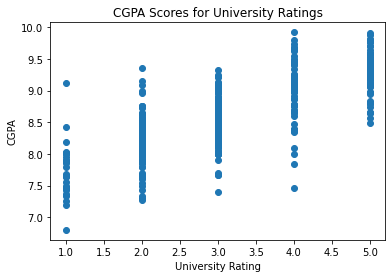

In [121]:
plt.scatter(adm.UniversityRating,adm.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

In [122]:
adm.groupby('UniversityRating')[['SOP','LOR','CGPA']].mean()

,SOP,LOR,CGPA
UniversityRating,,,
1,1.884615,2.211538,7.745769
2,2.705607,2.925234,8.183738
3,3.364662,3.402256,8.552256
4,4.108108,4.006757,9.021622
5,4.500000,4.358333,9.291167


### CGPA Analysis

In [123]:
print("Min CGPA Score :",min(adm.CGPA))
print("Max CGPA Score :",max(adm.CGPA))

Min CGPA Score : 6.8
Max CGPA Score : 9.92


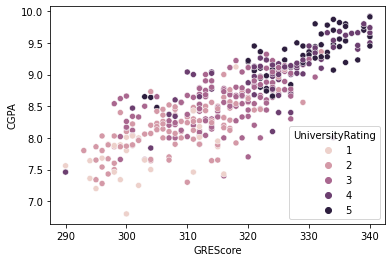

In [124]:
sns.scatterplot(y="CGPA", x="GREScore",hue="UniversityRating",data=adm)
plt.show()

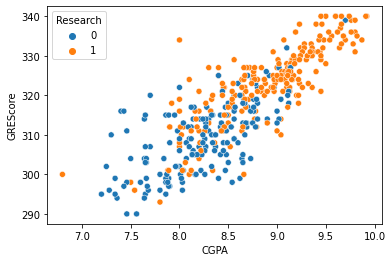

In [125]:
sns.scatterplot(x="CGPA", y="GREScore",hue="Research", data=adm)
plt.show()

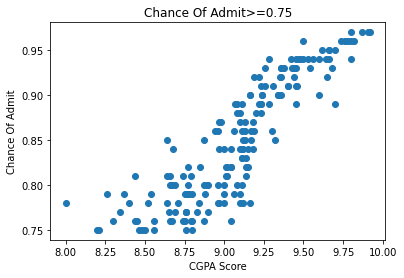

In [126]:
plt.scatter(x=adm[adm.ChanceOfAdmit >=0.75].CGPA,y=adm[adm.ChanceOfAdmit >=0.75].ChanceOfAdmit)
plt.xlabel("CGPA Score")
plt.ylabel("Chance Of Admit")
plt.title("Chance Of Admit>=0.75")
plt.show()

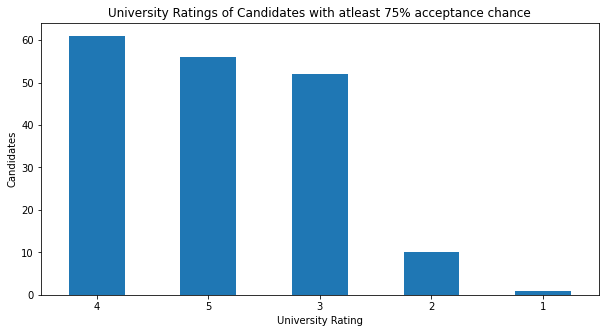

In [127]:
s = adm[adm["ChanceOfAdmit"] >= 0.75]["UniversityRating"].value_counts()
plt.title("University Ratings of Candidates with atleast 75% acceptance chance")
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.xticks(rotation=360)
plt.show()

### EDA of new data (adm1)

In [128]:
adm1.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


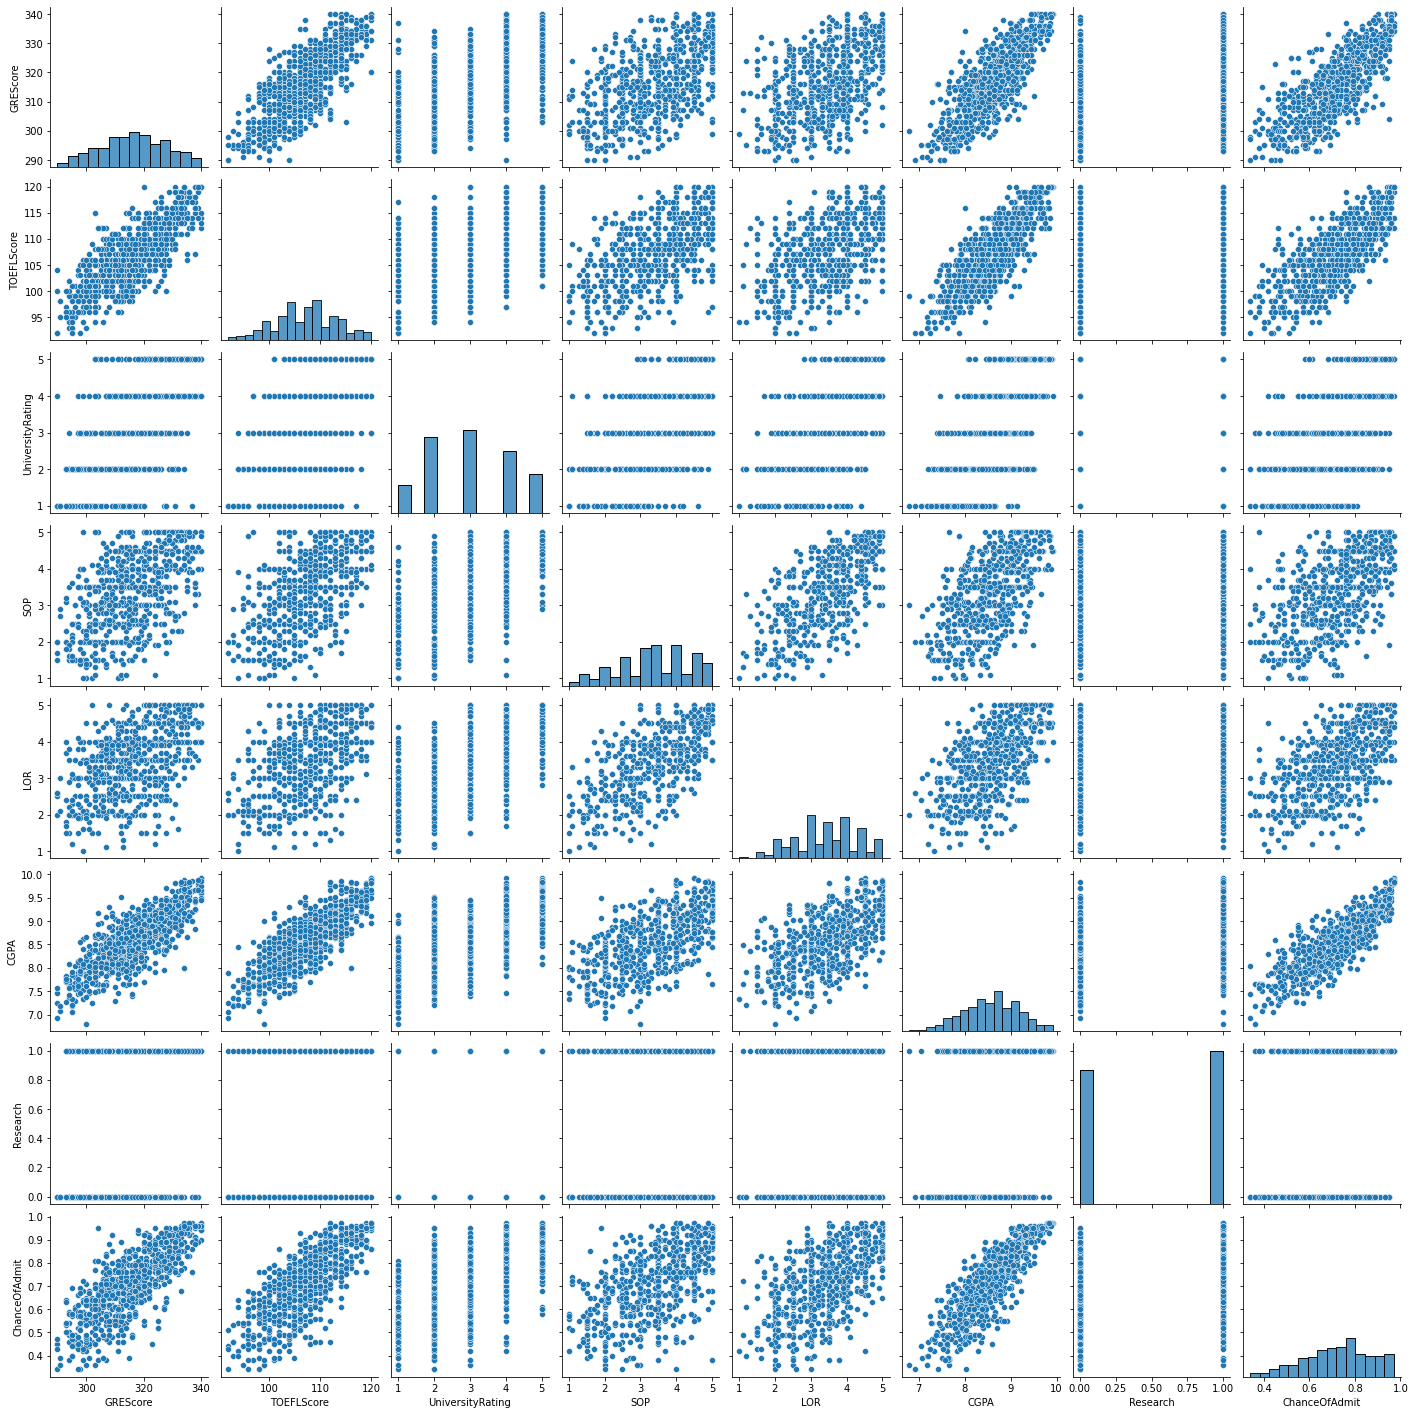

In [129]:
sns.pairplot(adm1)
plt.show()

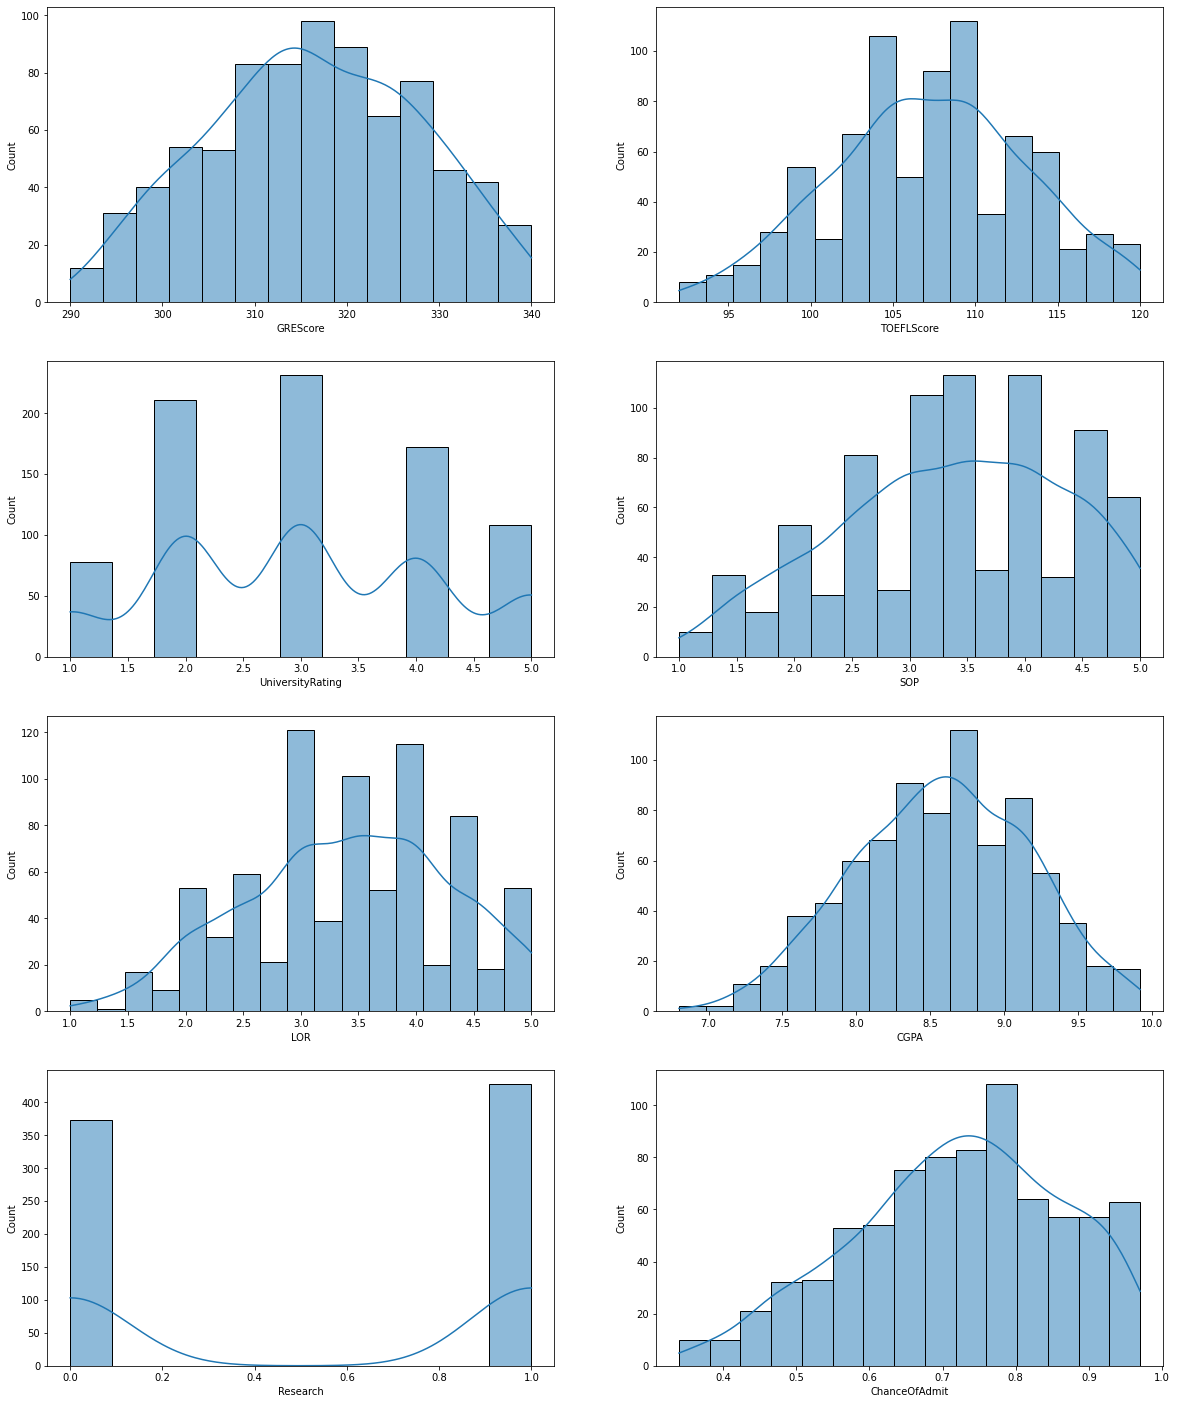

In [130]:
plt.figure(figsize=(20,25))
i = 0
for item in adm1.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm1[item],kde=True)
plt.show()

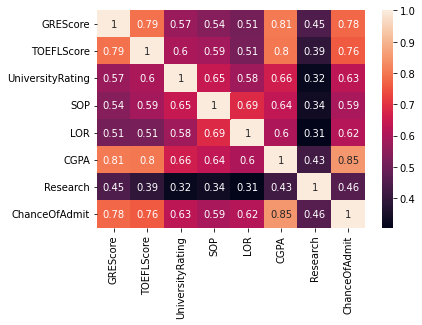

In [131]:
print()
adm1.corr()
sns.heatmap(adm1.corr(),annot=True)

In [132]:
#sns.countplot(x=adm['University Rating'],hue=adm['Research'])

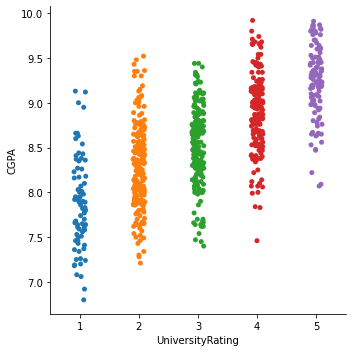

In [133]:
sns.catplot(y="CGPA", x="UniversityRating", data=adm1) #can add hue
plt.show()

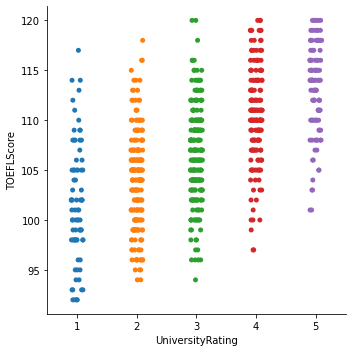

In [134]:
sns.catplot(y="TOEFLScore", x="UniversityRating", data=adm1) #can add hue
plt.show()

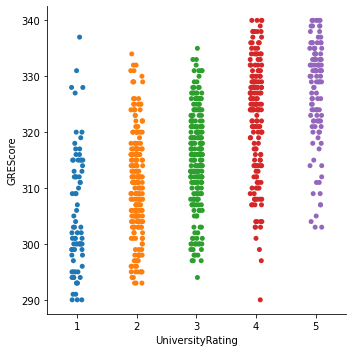

In [135]:
sns.catplot(y="GREScore", x="UniversityRating",data=adm1) #can add hue
plt.show()

### EDA of new data (adm2)

In [136]:
adm2.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


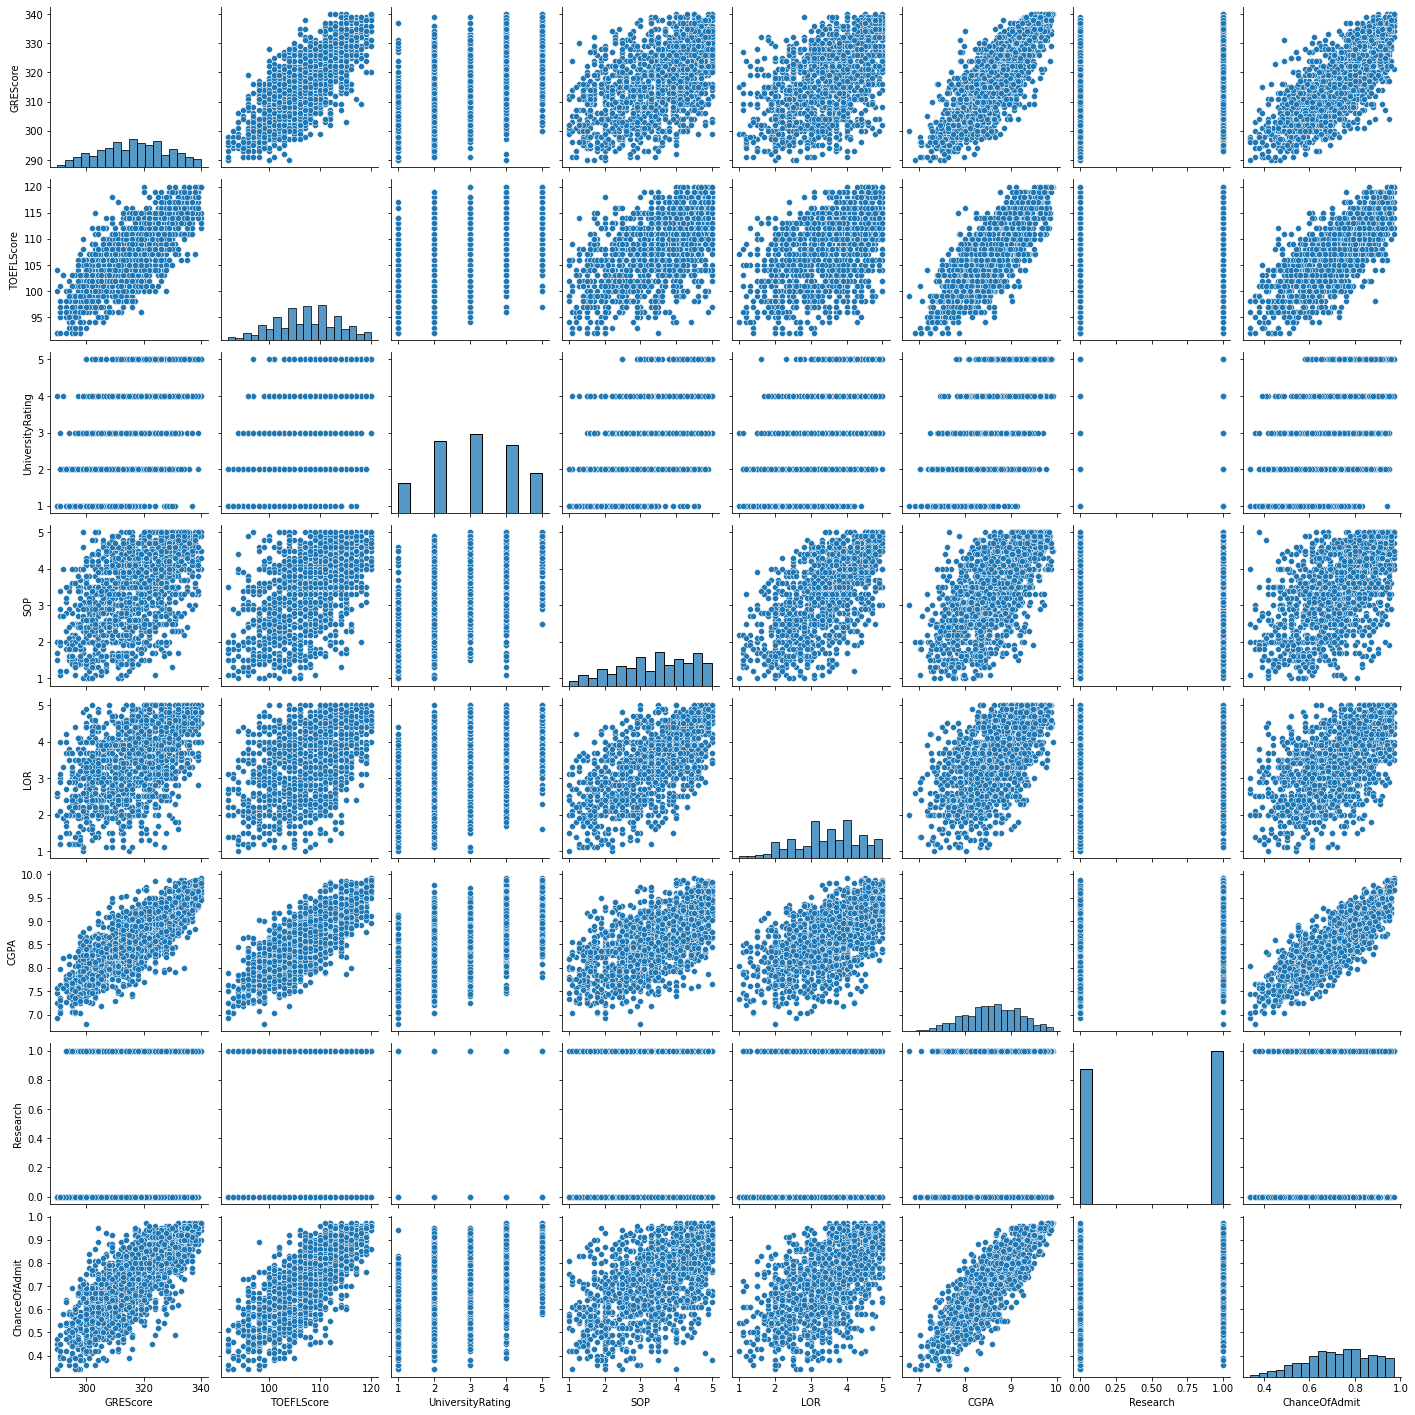

In [137]:
sns.pairplot(adm2)
plt.show()

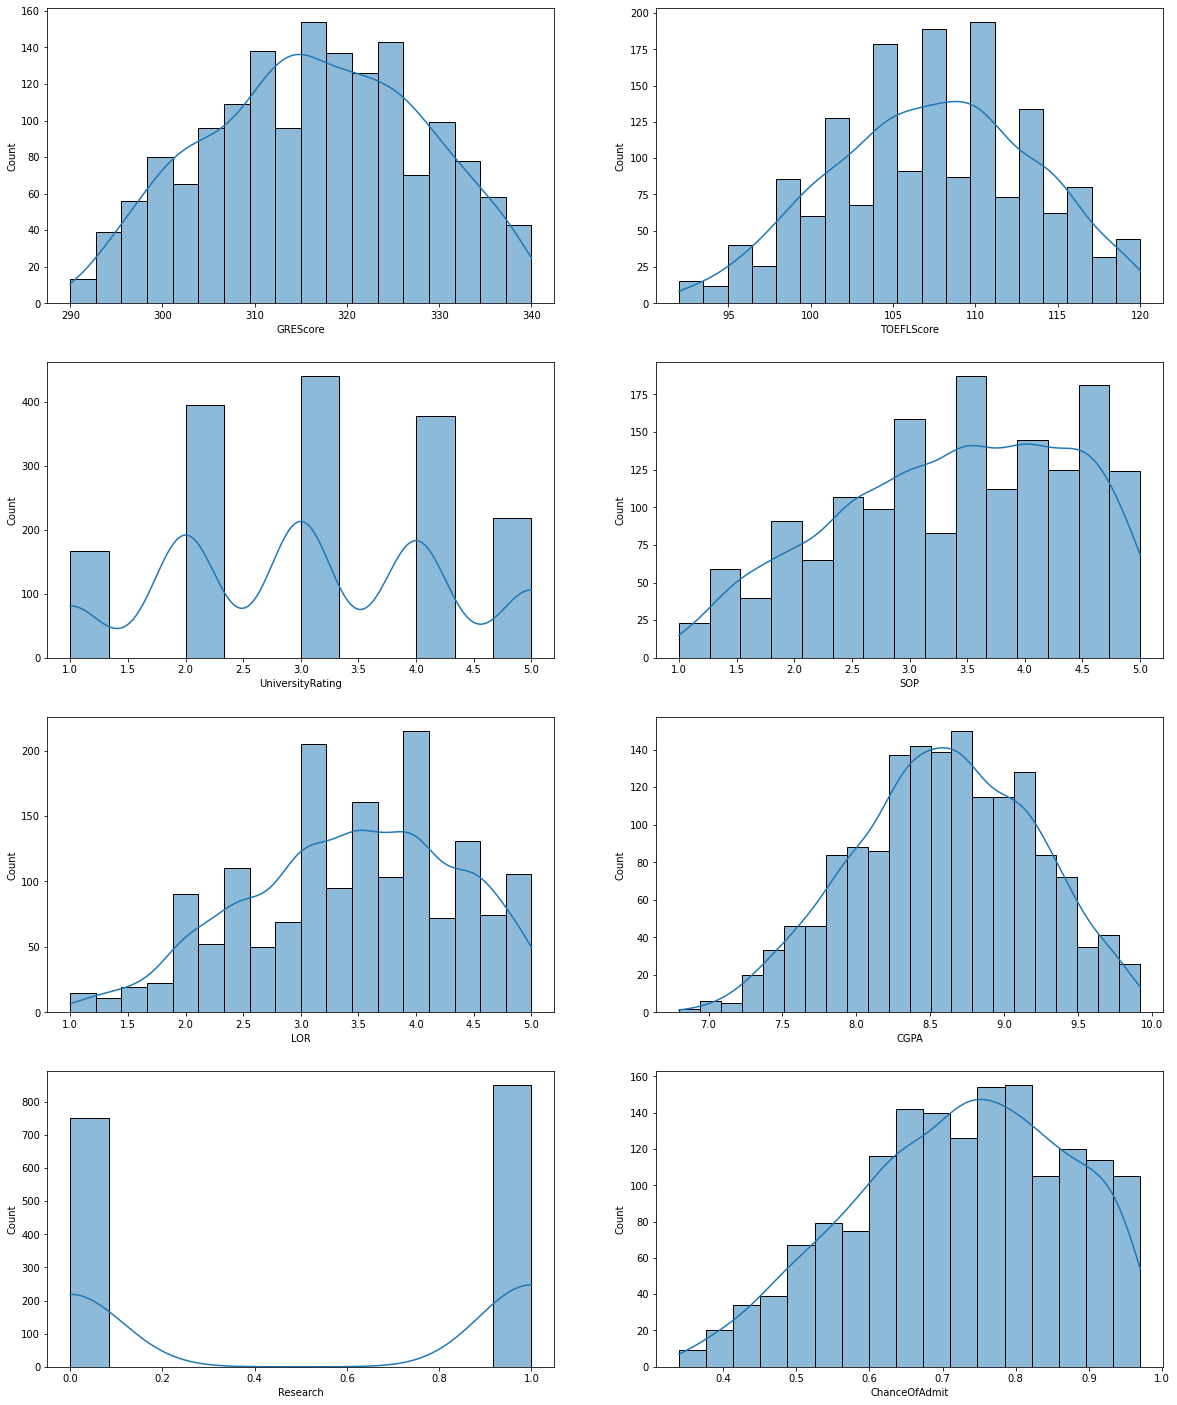

In [138]:
plt.figure(figsize=(20,25))
i = 0
for item in adm2.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm2[item],kde=True)
plt.show()

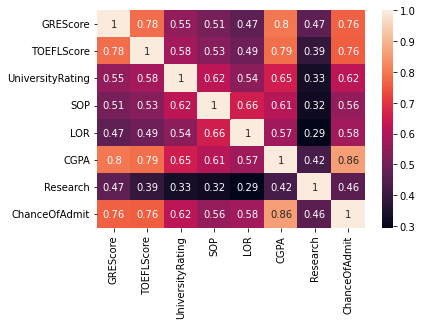

In [139]:
adm2.corr()
sns.heatmap(adm2.corr(),annot=True)

In [140]:
#sns.countplot(x=adm['University Rating'],hue=adm['Research'])

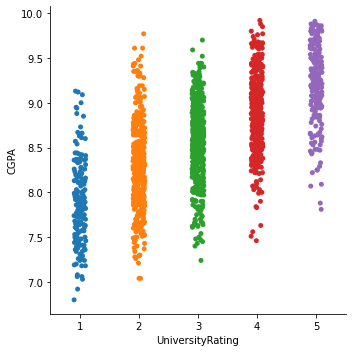

In [141]:
sns.catplot(y="CGPA", x="UniversityRating", data=adm2) #can add hue
plt.show()

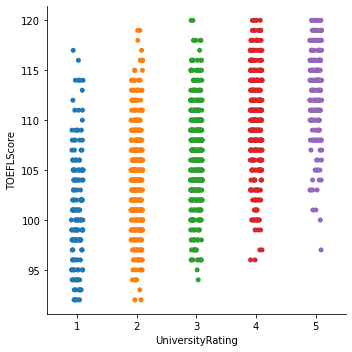

In [142]:
sns.catplot(y="TOEFLScore", x="UniversityRating", data=adm2) #can add hue
plt.show()

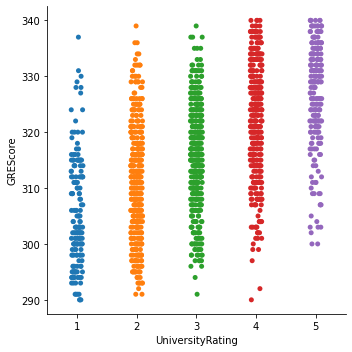

In [143]:
sns.catplot(y="GREScore", x="UniversityRating",data=adm2) #can add hue
plt.show()

### Comparing description of datasets (Original and synthetically modified)

In [151]:
admdes = adm.describe()

In [148]:
admdes1 = adm1.describe()

In [149]:
admdes2 = adm2.describe()

In [152]:
admdes.compare(admdes1, align_axis=1, keep_shape=False, keep_equal=False)

GREScore              TOEFLScore             UniversityRating  \
             self       other        self       other             self   
count  400.000000  800.000000  400.000000  800.000000       400.000000   
mean   316.807500  316.362500  107.410000  107.238750         3.087500   
std     11.473646   11.527345    6.069514    5.985109         1.143728   
25%           NaN         NaN         NaN         NaN              NaN   
50%    317.000000  316.000000         NaN         NaN              NaN   
75%           NaN         NaN  112.000000  111.000000              NaN   

                         SOP                     LOR                    CGPA  \
           other        self       other        self       other        self   
count  800.00000  400.000000  800.000000  400.000000  800.000000  400.000000   
mean     3.02625    3.400000    3.368750    3.452500    3.417250    8.598925   
std      1.18736    1.006869    0.993407    0.898478    0.886318    0.596317   
25%          NaN    2.500000    2.600000    3.000000    2.900000    8.170000   
50%          NaN         NaN         NaN         NaN         NaN    8.610000   
75%          NaN    4.000000    4.025000         NaN         NaN    9.062500   

                     Research             ChanceOfAdmit             
            other        self       other          self      other  
count  800.000000  400.000000  800.000000    400.000000  800.00000  
mean     8.577013    0.547500    0.533750      0.724350    0.72015  
std      0.590873    0.498362    0.499172      0.142609    0.14355  
25%      8.147500         NaN         NaN      0.640000    0.63000  
50%      8.600000         NaN         NaN           NaN        NaN  
75%      9.020000         NaN         NaN           NaN        NaN

In [153]:
admdes.compare(admdes2, align_axis=1, keep_shape=False, keep_equal=False)

GREScore               TOEFLScore              UniversityRating  \
             self        other        self        other             self   
count  400.000000  1600.000000  400.000000  1600.000000       400.000000   
mean   316.807500   316.536250  107.410000   107.363750         3.087500   
std     11.473646    11.592732    6.069514     6.134224         1.143728   
25%           NaN          NaN         NaN          NaN              NaN   
50%    317.000000   316.000000  107.000000   108.000000              NaN   
75%           NaN          NaN         NaN          NaN              NaN   

                           SOP                      LOR               \
             other        self        other        self        other   
count  1600.000000  400.000000  1600.000000  400.000000  1600.000000   
mean      3.053750    3.400000     3.384812    3.452500     3.443563   
std       1.202816    1.006869     1.014979    0.898478     0.905571   
25%            NaN    2.500000     2.600000    3.000000     2.800000   
50%            NaN         NaN          NaN         NaN          NaN   
75%            NaN    4.000000     4.200000    4.000000     4.100000   

             CGPA                 Research              ChanceOfAdmit  \
             self        other        self        other          self   
count  400.000000  1600.000000  400.000000  1600.000000    400.000000   
mean     8.598925     8.595250    0.547500     0.530625      0.724350   
std      0.596317     0.600805    0.498362     0.499217      0.142609   
25%      8.170000     8.190000         NaN          NaN      0.640000   
50%           NaN          NaN         NaN          NaN      0.730000   
75%      9.062500     9.050000         NaN          NaN      0.830000   

                    
             other  
count  1600.000000  
mean      0.723794  
std       0.145009  
25%       0.620000  
50%       0.740000  
75%       0.840000

### Insights from Visualizations

## To do: 
- Apply PCA
- Make a model
- Train and Test
- Diff models and analysis
- Compare models
- Result